In [655]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [656]:
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [657]:
data.shape

(730, 16)

In [658]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [659]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [660]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [661]:
# renaming few columns for better readibility

data.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [662]:
data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [663]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [664]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [665]:
# Encoding/mapping the season column

data.season = data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [666]:
# Encoding/mapping the month column

data.month = data.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [667]:
# Encoding/maping the weekdays

data.weekday=data.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [668]:
# Encoding/mapping the weathersit column

data.weathersit = data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [669]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [670]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Data Visulisation

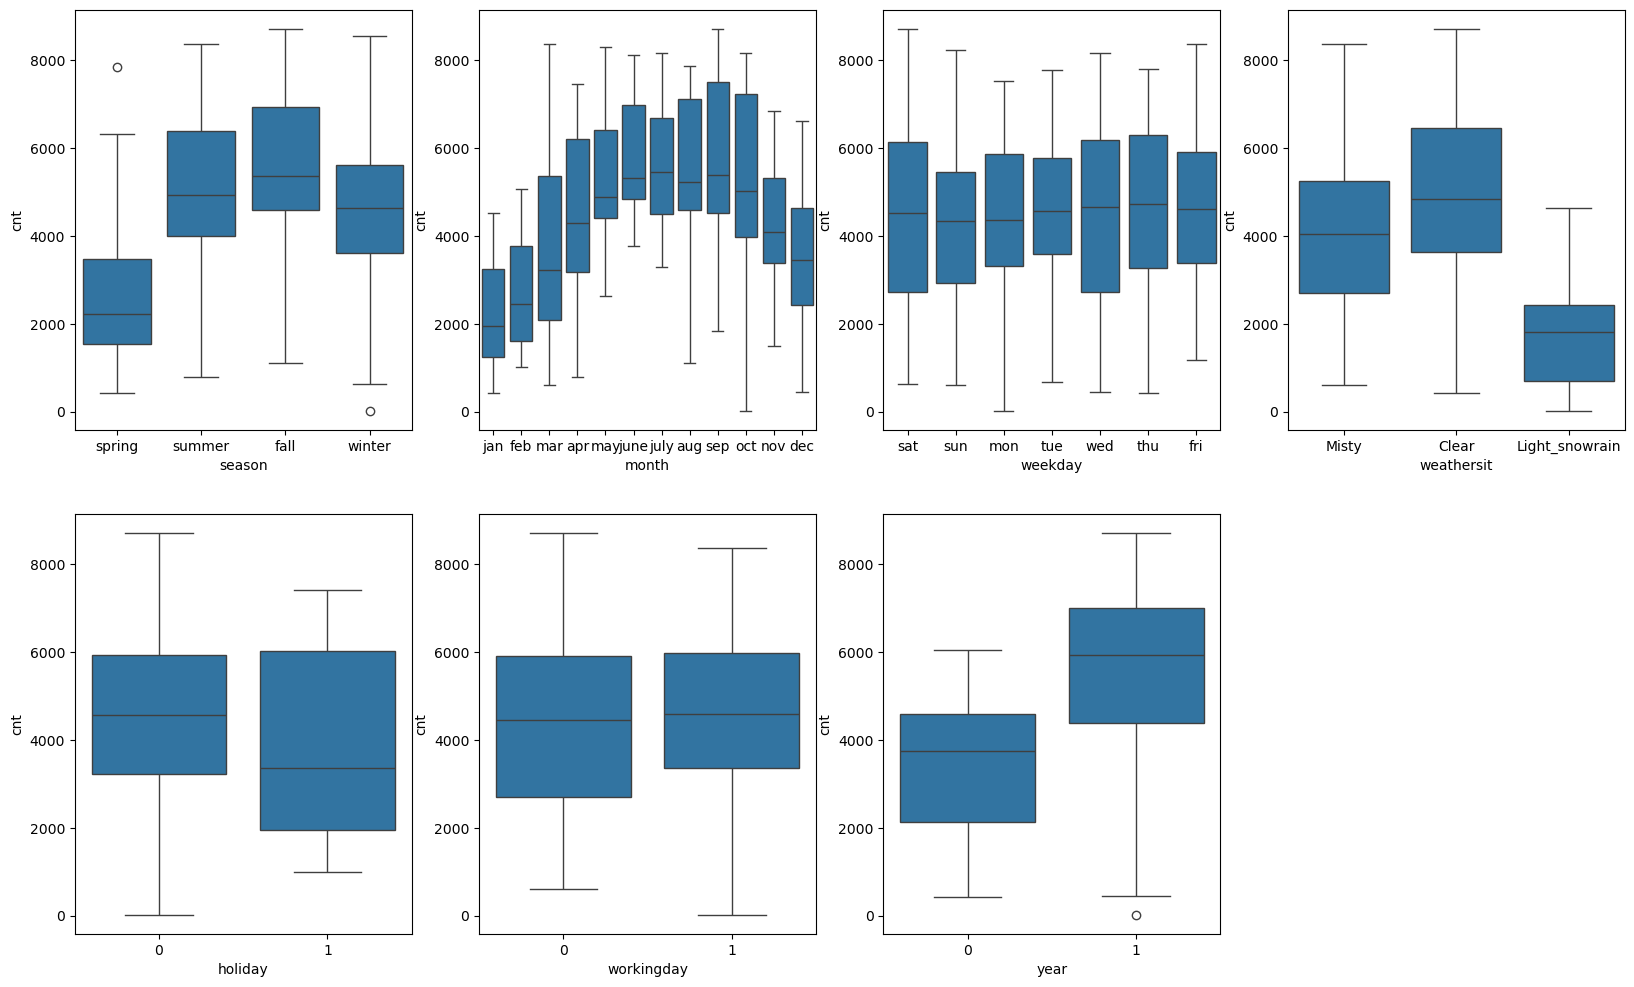

In [672]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = data)
plt.show()

<Axes: xlabel='season', ylabel='cnt'>

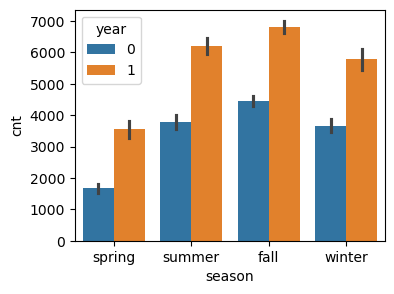

In [673]:
plt.figure(figsize=(4,3))
sns.barplot(x='season',y='cnt',data=data, hue='year')

<Axes: xlabel='month', ylabel='cnt'>

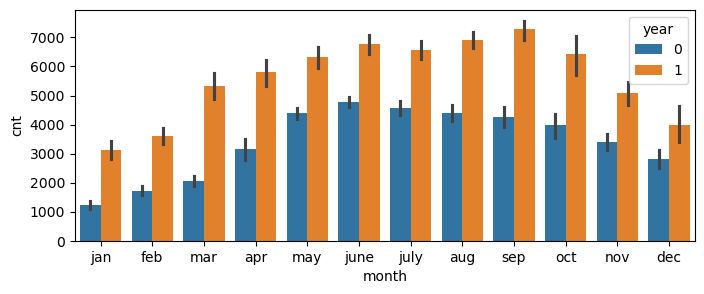

In [674]:
plt.figure(figsize=(8,3))
sns.barplot(x='month',y='cnt',data=data, hue='year')

<Axes: xlabel='weekday', ylabel='cnt'>

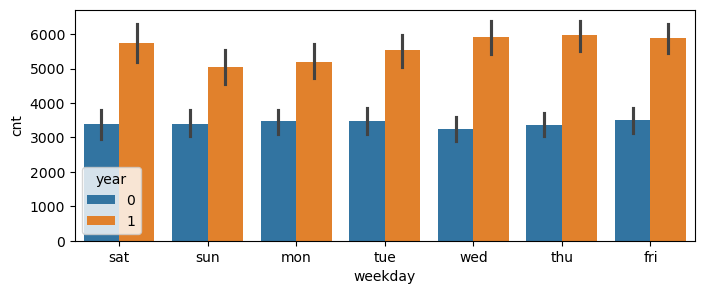

In [675]:
plt.figure(figsize=(8,3))
sns.barplot(x='weekday',y='cnt',data=data, hue='year')

<Axes: xlabel='year', ylabel='cnt'>

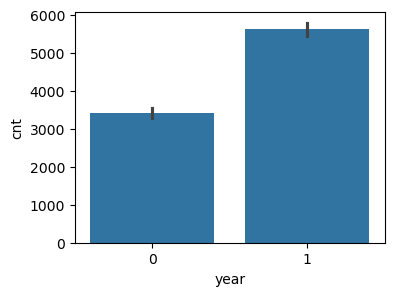

In [676]:
plt.figure(figsize=(4,3))
sns.barplot(x='year',y='cnt',data=data)

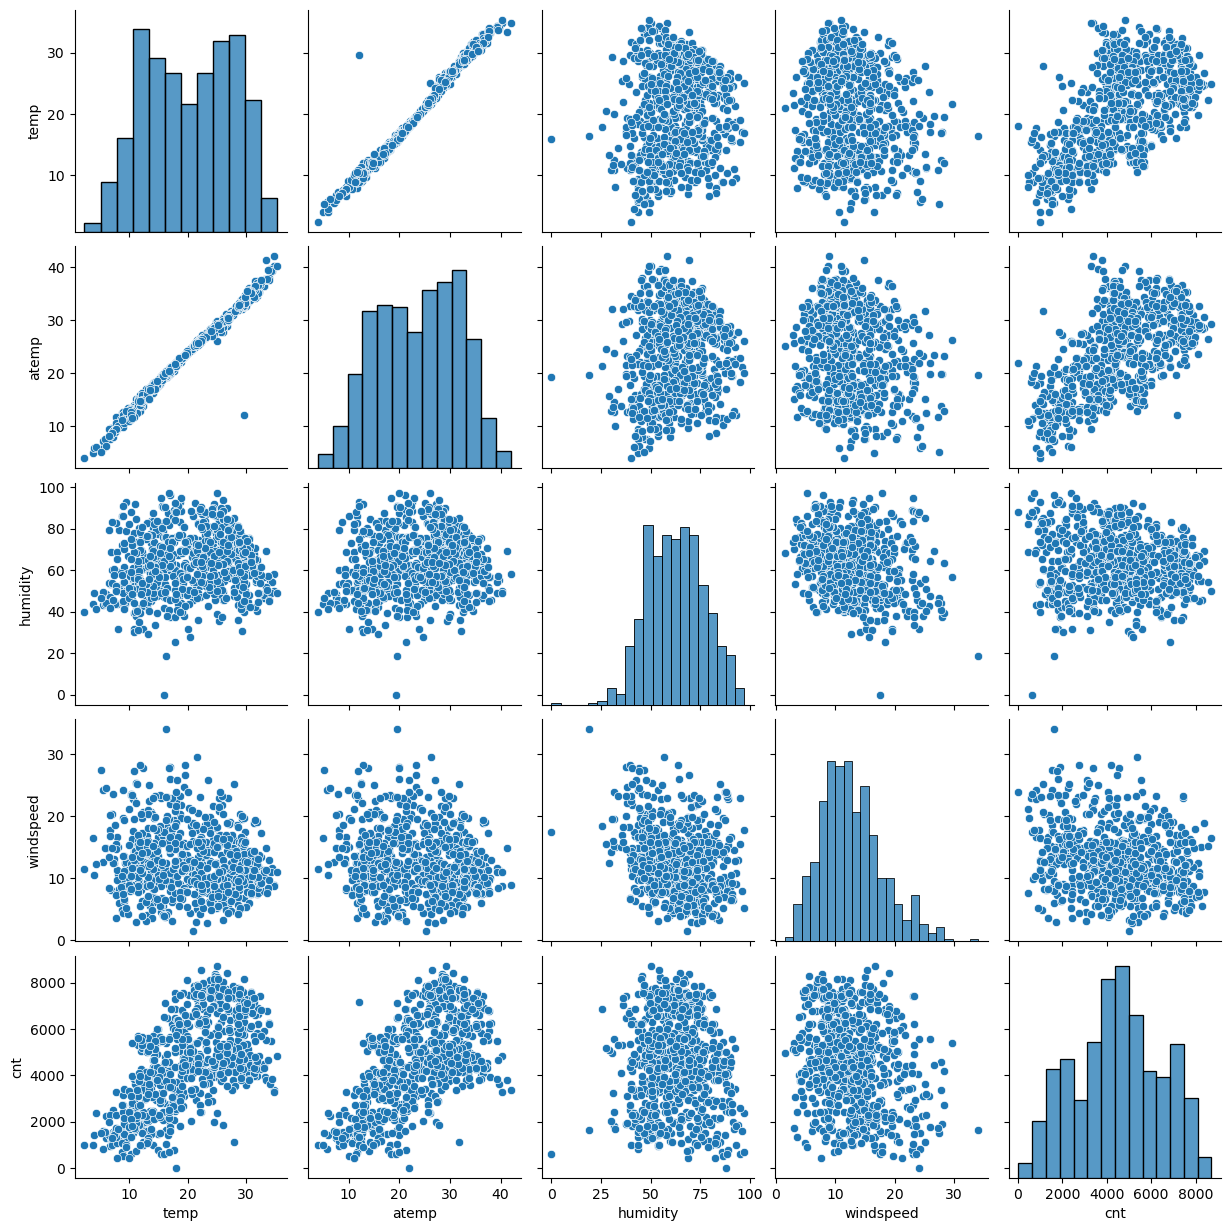

In [677]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=data,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

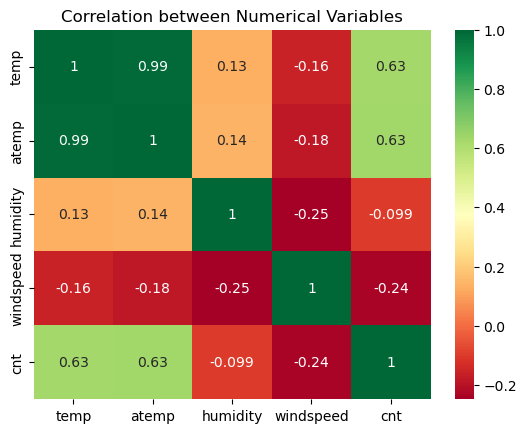

In [678]:
sns.heatmap(data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()

### Data preperation

In [680]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [681]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(data.month,drop_first=True).astype(int)
weekdays_df=pd.get_dummies(data.weekday,drop_first=True).astype(int)
weathersit_df=pd.get_dummies(data.weathersit,drop_first=True).astype(int)
seasons_df=pd.get_dummies(data.season,drop_first=True).astype(int)

In [682]:
# Merging  the dataframe, with the dummy variable dataset. 

data = pd.concat([data,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [683]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [684]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    int32  
 13  dec             730 non-null    int32  
 14  feb             730 non-null    int32  
 15  jan             730 non-null    int32  
 16  july            730 non-null    int32  
 17  june            730 non-null    int

In [685]:
# dropping unnecessary columns as we have already created dummy variable out of it.

data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [686]:
data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [687]:
data.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


### Spliting data into training and test sets

In [689]:
df_train,df_test=train_test_split(data, train_size=0.7, random_state=100)

In [690]:
df_train.shape

(510, 30)

In [691]:
df_test.shape

(220, 30)

In [692]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [693]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [694]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [695]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Building linear model

In [697]:
y_train=df_train.pop('cnt')
X_train=df_train

In [698]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [699]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [700]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [701]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [702]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [703]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [704]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [705]:
X_train[col]

,year,holiday,workingday,temp,humidity,windspeed,jan,july,sep,sat,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,1,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,1,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,0,1,0,1,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,0,0,0,0,1,0,1,0


In [706]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [707]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


In [708]:
X_train_lm_1=sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.22e-191
Time:                        21:53:32   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
year               0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
humidity          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                0.0814      0.016      4.945      0.000       0.049       0.114
sat                0.0536      0.014      3.694      0.000       0.025       0.082
Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### droping humidity var

In [710]:
X_train_rfe.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [711]:
# As temp shows high VIF and p values hence we can drop it
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [712]:
X_train_lm_2=sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.60e-188
Time:                        21:53:32   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
year               0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                0.0755      0.017      4.527      0.000       0.043       0.108
sat                0.0583      0.015      3.968      0.000       0.029       0.087
Light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [713]:
# Droping working days
X_train_rfe = X_train_rfe.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,year,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,Misty,1.56
6,sep,1.34


In [714]:
X_train_lm_3=sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.48e-186
Time:                        21:53:32   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.978      0.000       0.152       0.272
year               0.2347      0.008     28.620      0.000       0.219       0.251
holiday           -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp               0.4734      0.034     13.837      0.000       0.406       0.541
windspeed         -0.1570      0.025     -6.226      0.000      -0.207      -0.107
jan               -0.0386      0.018     -2.159      0.031      -0.074      -0.003
july              -0.0508      0.019     -2.735      0.006      -0.087      -0.014
sep                0.0762      0.017      4.504      0.000       0.043       0.109
sat                0.0201      0.011      1.787      0.075      -0.002       0.042
Light_snowrain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Misty             -0.0794      0.009     -9.097      0.000      -0.097      -0.062
spring            -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer             0.0437      0.015      2.871      0.004       0.014       0.074
winter             0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [715]:
# Droping sat
X_train_rfe = X_train_rfe.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [716]:
X_train_lm_4=sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          8.14e-187
Time:                        21:53:32   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [717]:
# Droping jan
X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [718]:
X_train_lm_5=sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.06e-187
Time:                        21:53:32   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
year               0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [719]:
lr_5.params

const             0.199434
year              0.233570
holiday          -0.097463
temp              0.490988
windspeed        -0.147919
july             -0.052057
sep               0.076846
Light_snowrain   -0.284199
Misty            -0.080167
spring           -0.067169
summer            0.046487
winter            0.081741
dtype: float64

### Residual Analysis

In [721]:
y_train_pred=lr_5.predict(X_train_lm_5)

<Axes: ylabel='Density'>

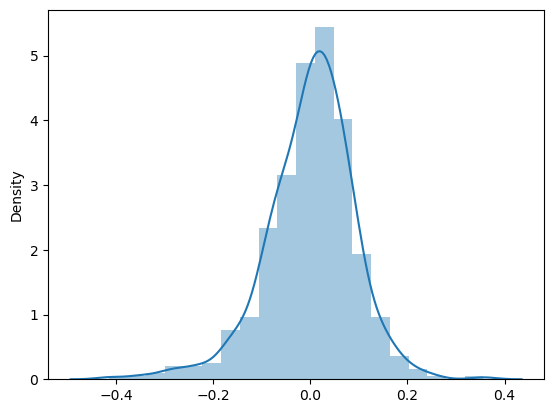

In [722]:
sns.distplot((y_train - y_train_pred), bins = 20)

### Multicolleniarity

In [724]:
calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


VIF values are less than 5 for every variables

### Homoscedasticity

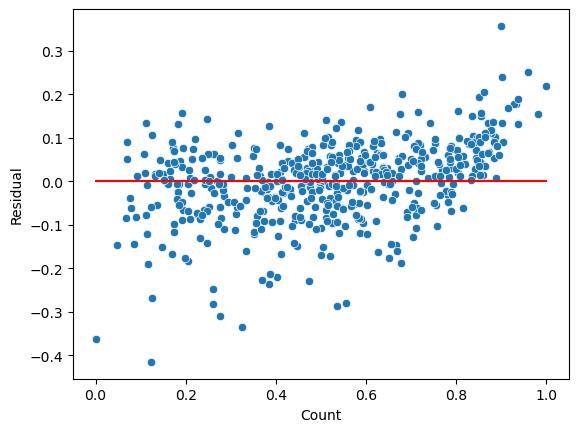

In [727]:
y_train_pred = lr_5.predict(X_train_lm_5)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No pattern can be observed

### Making prediction using final model

In [730]:
# Applying scaling on test data
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [731]:
y_test=df_test.pop('cnt')
X_test=df_test

In [732]:
col1 = X_train_rfe.columns
X_test = X_test[col1]

X_test_lm_5 = sm.add_constant(X_test)

In [733]:
y_test_pred=lr_5.predict(X_test_lm_5)

In [734]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8053

### Model evaluation

Text(0, 0.5, 'y_test_pred')

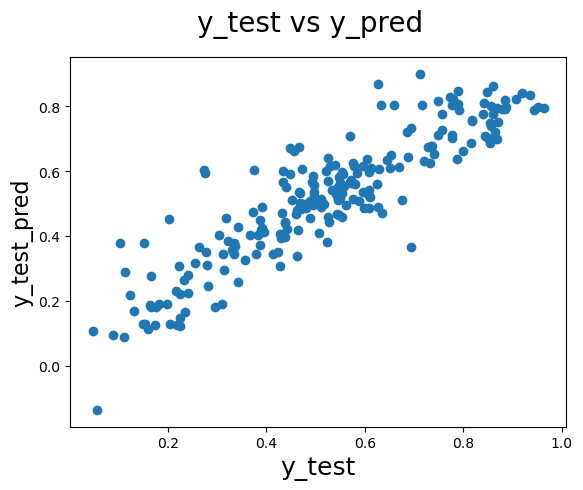

In [736]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [737]:
round(lr_5.params,4)

const             0.1994
year              0.2336
holiday          -0.0975
temp              0.4910
windspeed        -0.1479
july             -0.0521
sep               0.0768
Light_snowrain   -0.2842
Misty            -0.0802
spring           -0.0672
summer            0.0465
winter            0.0817
dtype: float64

In [738]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.795


# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.835
    - Test dataset R^2           : 0.805
    - Train dataset Adjusted R^2 : 0.832    
    - Test dataset Adjusted R^2  : 0.795

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.